# Lab 1 ✓
Решение СЛАУ по Гауссу, LU разложение

In [ ]:
import numpy as np
import scipy as sp
from math import sqrt
from sympy import Matrix, pprint, pretty

In [ ]:
# Ax = f
L = np.zeros((4,4))
A = np.array([[3,-1,0,2,2],
              [-2,1,1,2,1],
              [0,-1,4,2,-3],
              [1,2,3,5,2]], dtype='float64')
f = A[:,-1].reshape(len(A),1)
print('A|f = \n')
pprint(Matrix(A))
for i in range(len(A)-1):  # Приведение к треугольному виду
  L[i:,i] = A[i:,i]
  A[i] = A[i]/A[i,i]
  for j in range(len(A)-i-1):
    A[i+j+1] = A[i+j+1] - A[i]*A[i+j+1,i]
L[-1,-1] = A[-1,-2]
A[-1] = A[-1]/A[-1,-2]
U = np.copy(A[:,:-1])
print('Ux = \n')
pprint(Matrix(A))

for i in range(len(A)-1):
  for j in range(len(A)-1-i):
    A[-i-j-2] = A[-i-j-2] - A[-i-1]*A[-i-j-2,-i-2]
print('x = \n')
pprint(Matrix(A))
print('U = \n')
pprint(Matrix(U))
print('L = \n')
pprint(Matrix(L))
print('LU = \n')
pprint(Matrix(L @ U))

A|f = 

⎡3.0   -1.0  0.0  2.0  2.0 ⎤
⎢                          ⎥
⎢-2.0  1.0   1.0  2.0  1.0 ⎥
⎢                          ⎥
⎢0.0   -1.0  4.0  2.0  -3.0⎥
⎢                          ⎥
⎣1.0   2.0   3.0  5.0  2.0 ⎦
Ux = 

⎡1.0  -0.333333333333333  0.0  0.666666666666667  0.666666666666667⎤
⎢                                                                  ⎥
⎢0.0         1.0          3.0        10.0                7.0       ⎥
⎢                                                                  ⎥
⎢0.0         0.0          1.0  1.71428571428571   0.571428571428571⎥
⎢                                                                  ⎥
⎣0.0         0.0          0.0         1.0         1.04705882352941 ⎦
x = 

⎡1.0  0.0  0.0  0.0  0.0352941176470604⎤
⎢                                      ⎥
⎢0.0  1.0  0.0  0.0  0.200000000000003 ⎥
⎢                                      ⎥
⎢0.0  0.0  1.0  0.0   -1.2235294117647 ⎥
⎢                                      ⎥
⎣0.0  0.0  0.0  1.0   1.04705882352941 ⎦
U = 



Разложение симметричных матриц по Холецкому

In [ ]:
A = np.array([[5,1,1,0],
              [1,8,2,-1],
              [1,2,6,1],
              [0,-1,1,9]], dtype='float64')
L = np.zeros(np.shape(A))
for i in range(len(A)):
  for j in range(len(A)):
    if i == j:
      local_sum = 0
      for k in range(i):
        local_sum += L[i,k] ** 2
      L[i,i] = sqrt(A[i,i]-local_sum)
    elif j > i:
      local_sum = 0
      for k in range(i):
        local_sum += L[i,k]*L[j,k]
      L[j,i] = (1/L[i,i])*(A[i,j]-local_sum)
#print(A, L, L @ L.transpose(), sep='\n\n')
print('A\n')
pprint(Matrix(A))
print('L\n')
pprint(Matrix(L))
print('L @ Lt\n')
pprint(Matrix(L @ L.transpose()))

A

⎡5.0  1.0   1.0  0.0 ⎤
⎢                    ⎥
⎢1.0  8.0   2.0  -1.0⎥
⎢                    ⎥
⎢1.0  2.0   6.0  1.0 ⎥
⎢                    ⎥
⎣0.0  -1.0  1.0  9.0 ⎦
L

⎡2.23606797749979          0.0                 0.0               0.0       ⎤
⎢                                                                          ⎥
⎢0.447213595499958   2.79284800875379          0.0               0.0       ⎥
⎢                                                                          ⎥
⎢0.447213595499958   0.64450338663549   2.32047740446129         0.0       ⎥
⎢                                                                          ⎥
⎣       0.0         -0.358057437019716  0.530394835305437  2.93095141387164⎦
L @ Lt

⎡5.0  1.0   1.0  0.0 ⎤
⎢                    ⎥
⎢1.0  8.0   2.0  -1.0⎥
⎢                    ⎥
⎢1.0  2.0   6.0  1.0 ⎥
⎢                    ⎥
⎣0.0  -1.0  1.0  9.0 ⎦


# Lab 2 ✓
Якоби, Зейдель, SOR

In [ ]:
import numpy as np
from sympy import Matrix, pprint
A = np.array([[10, 3, 0],
              [3, 15, 1],
              [0, 1, 7]])
f = np.array([[2],
              [12],
              [5]])
xdef = np.linalg.solve(A,f)
epsilon = 1e-6
w = 1
Xstart = [[1],[1],[1]]
XJacobi = [Xstart]
XSeidel = [Xstart]
XSOR = [Xstart]
print('A\n')
pprint(Matrix(A))
print('\nf\n')
pprint(Matrix(f))
def criteria(x):
  global xdef
  dif = xdef - x
  return np.linalg.norm(dif)/np.linalg.norm(xdef)

D = np.diag(np.diag(A))
Dinv = np.linalg.inv(D)
Aup = np.zeros(np.shape(A))
Adown = np.zeros(np.shape(A))
for i in range(len(A)):
  for j in range(len(A)):
    if i < j: Aup[i,j] = A[i,j]
    elif i > j: Adown[i,j] = A[i,j]

# Якоби
iter = 0
while criteria(XJacobi[iter]) > epsilon:
  x = - Dinv @ Adown @ XJacobi[iter] - Dinv @ Aup @ XJacobi[iter] + Dinv @ f
  XJacobi.append(x)
  iter += 1
print('\nJacobi; Iterations:',iter,'; Error:', criteria(XJacobi[iter]), end='\n\n')
pprint(Matrix(XJacobi[iter]))
# Seidel
iter = 0
while criteria(XSeidel[iter]) > epsilon:
  x = np.linalg.inv(D + Adown) @ (f - Aup @ XSeidel[iter])
  XSeidel.append(x)
  iter += 1
print('\nSeidel; Iterations:',iter,'; Error:', criteria(XSeidel[iter]), end='\n\n')
pprint(Matrix(XSeidel[iter]))

# SOR
iter = 0
while criteria(XSOR[iter]) > epsilon:
  x = np.linalg.inv(D + w*Adown) @ (w*f - (w*Aup + (w-1)*D) @ XSOR[iter])
  XSOR.append(x)
  iter += 1
print('\nSOR; Iterations:',iter,'; Error:', criteria(XSOR[iter]), end='\n\n')
pprint(Matrix(XSOR[iter]))

A

⎡10  3   0⎤
⎢         ⎥
⎢3   15  1⎥
⎢         ⎥
⎣0   1   7⎦

f

⎡2 ⎤
⎢  ⎥
⎢12⎥
⎢  ⎥
⎣5 ⎦

Jacobi; Iterations: 11 ; Error: 4.0763425791998534e-07

⎡-0.0296828163662345⎤
⎢                   ⎥
⎢ 0.765608629878057 ⎥
⎢                   ⎥
⎣ 0.604912944587507 ⎦

Seidel; Iterations: 6 ; Error: 9.052103235235528e-08

⎡-0.0296826161093503⎤
⎢                   ⎥
⎢ 0.765608987225342 ⎥
⎢                   ⎥
⎣ 0.604913001824951 ⎦

SOR; Iterations: 6 ; Error: 9.052103235235528e-08

⎡-0.0296826161093503⎤
⎢                   ⎥
⎢ 0.765608987225342 ⎥
⎢                   ⎥
⎣ 0.604913001824951 ⎦


# Lab 3 ✓
Интерполирование и аппроксимация **функций**

[1.6288378776596186, 3.844509626105842, 3.744892105649286, 3.6786531977891386, 3.867234746486715, 3.819698424644651, 3.7730119790153944, 3.8275864056169793, 3.7309704454400867, 3.6555426622920986, 3.6250418427196607, 3.4822470707331297, 3.3739876079940148, 3.28108375599429, 3.1043127822404983, 2.970982939754354, 2.8356902895161795, 2.641270811109409, 2.496028837689632, 2.3386906989290597, 2.1449223061109772, 2.0033498048131473, 1.844302096931988, 1.6696181700646373, 1.547548481510876, 1.405907502938133, 1.2671365880885226, 1.1788173244370115, 1.0710725967682593, 0.9818739998591131, 0.9384278834650666, 0.8771475899946015, 0.8467394249254938, 0.8549886893622105, 0.8478229809060811, 0.8801102948562132, 0.9418403775366013, 0.9909415505240999, 1.084121165104729, 1.1958364315891286, 1.297761230401755, 1.444438794364713, 1.5976255206681476, 1.7437338283887711, 1.9315430695067701, 2.1134120086278863, 2.2907275634803255, 2.503396654405515, 2.6980353362599367, 2.8904903135704707, 3.1092599674877

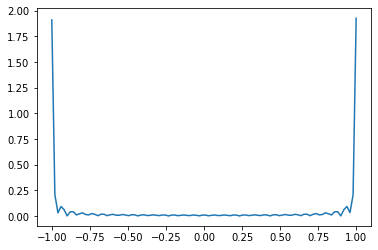

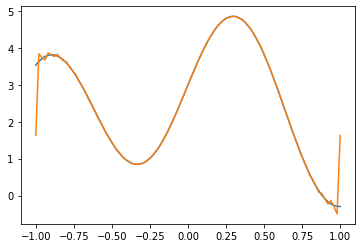

In [ ]:
# Фурье
from math import sin, cos, pi
from numpy import linspace
from scipy import integrate
import matplotlib.pyplot as plt


dots = 100
N = 64
A1 = 3
A2 = 2
w1 = 1
w2 = 5
an, bn = [], []

def function(x):
  return A1*cos(w1*x)+A2*sin(w2*x)

s = [A1*cos(w1*x)+A2*sin(w2*x) for x in linspace(-1,1,dots)]
a0 = integrate.quad(func=function,a=-1,b=1)[0]
for n in range(N):
  an.append(integrate.quad(func=(lambda x: function(x)*cos(pi*(n+1)*x)),a=-1,b=1)[0])
  bn.append(integrate.quad(func=(lambda x: function(x)*sin(pi*(n+1)*x)),a=-1,b=1)[0])

sum = []
for x in linspace(-1,1,dots):
  temp = 0
  for n in range(N):
    temp += an[n]*cos(pi*(n+1)*x) + bn[n]*sin(pi*(n+1)*x)
  sum.append(a0/2 + temp) 
#sum

difference = [abs(sum[i] - s[i]) for i in range(dots)]
print(sum, s, sep='\n\n')
difference

plt.plot(linspace(-1,1,dots),difference)
plt.show()
plt.plot(linspace(-1,1,dots),s)
plt.plot(linspace(-1,1,dots),sum)

[ 2.29559306e+00 -1.31031655e+00 -6.89420910e-01 -1.45932492e+00
  1.48598338e-02  1.04456218e+00 -1.25630028e-04 -2.13505641e-01
  5.65340651e-07  2.20811326e-02 -1.57836892e-09 -1.40370980e-03
  2.99991781e-12  6.08303288e-05 -4.17721413e-15 -1.91869731e-06]


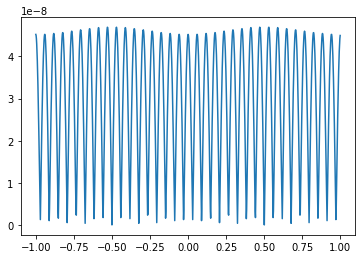

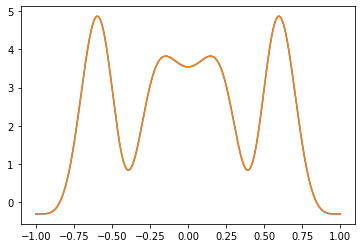

In [ ]:
# Чебышев через Fast Fourier Transform
from math import sin, cos, pi
from numpy import linspace
from scipy import integrate, fft
import matplotlib.pyplot as plt


dots = 1000
N = 64
A1 = 3
A2 = 2
w1 = 1
w2 = 5
an, bn = [], []
A = []
x = linspace(-1,1,int(dots))
t = linspace(0,2*pi-2*pi/dots,dots)
t2 = linspace(0,2*pi-2*pi/N,N)

def function(x):
  return A1*cos(w1*x)+A2*sin(w2*x)
s = [A1*cos(w1*cos(i))+A2*sin(w2*cos(i)) for i in t]
s2 = [A1*cos(w1*cos(i))+A2*sin(w2*cos(i)) for i in t2]
a = fft.fft(s2) / N * 2
a = a.real
a[0] = a[0]/2
print('Коэффициенты Чебышева:\n', a[:int(N/4)])
sum = []
for i in t:
  temp = 0
  for j in range(int(N/4)):
    temp += a[j]*cos(j*i)
  sum.append(temp)
difference = [abs(sum[i] - s[i]) for i in range(dots)]
#t = t[int((len(t)/2)):]
#s = s[int((len(s)/2)):]
#sum = sum[int((len(sum)/2)):]
#difference = difference[int((len(difference)/2)):]

plt.plot(x,difference)
plt.show()
plt.plot(x,sum,x,s)
plt.show()

11 [-0.08268626035052287, -0.03975748051651116, -0.5722432708819525, -1.3506188767558698, 0.5403825240031923, 0.6735140101809004, 0.2822123295557676, 0.14323288611718057, 0.30358592228738257, 0.20475643272085514, 0.3035859222873884]


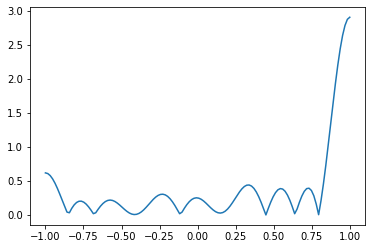

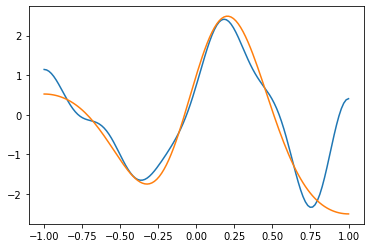

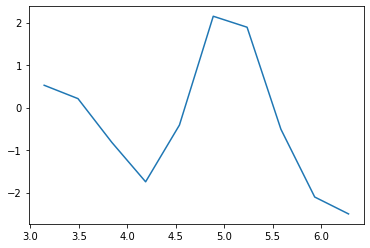

In [ ]:
# Чебышев через суммы
from math import sin, cos, pi
from numpy import linspace
from scipy import integrate, fft
import matplotlib.pyplot as plt


dots = 128
N = 10
A1 = 1
A2 = 2
w1 = 3
w2 = 4
an, bn = [], []
A = []
x = linspace(-1,1,int(dots))
t = linspace(pi,2*pi,dots)
t2 = linspace(pi,2*pi,N)

def function(x):
  return A1*cos(w1*x)+A2*sin(w2*x)
s = [A1*cos(w1*cos(i))+A2*sin(w2*cos(i)) for i in t]
s2 = [A1*cos(w1*cos(i))+A2*sin(w2*cos(i)) for i in t2]
a = fft.fft(s2) / N
a = a.real
a = []
temp = 0
for i in range(N-1):
  temp += s2[i]
a.append(temp/N)
for n in range(N):
  temp = 0
  for i in range(N-1):
    temp += s2[i]*cos((n+1)*t2[i])
  a.append(2*temp/N)



print(len(a),a)
sum = []
for i in t:
  temp = 0
  for j in range(N+1):
    temp += a[j]*cos(j*i)
  sum.append(temp)
difference = [abs(sum[i] - s[i]) for i in range(dots)]
#t = t[int((len(t)/2)):]
#s = s[int((len(s)/2)):]
#sum = sum[int((len(sum)/2)):]
#difference = difference[int((len(difference)/2)):]

plt.plot(x,difference)
plt.show()
plt.plot(x,sum,x,s)
plt.show()

17 [-0.2600519549019334, -0.2641733120941967, -0.9721825211717825, -1.720685895502488, 0.2640683678492245, 0.5283466241883933, -0.022787864664426557, -0.0607042776882338, 0.0009868835524177028, 0.003754407444870364, -2.5856703291475595e-05, -0.00014640364833007065, 4.5514508975037846e-07, 3.943434733427779e-06, -5.7603128055479264e-09, -7.791538050752582e-08, 5.4976236646624435e-11]


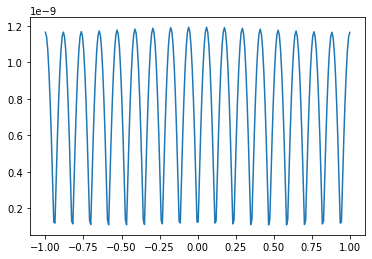

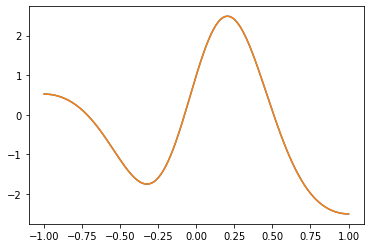

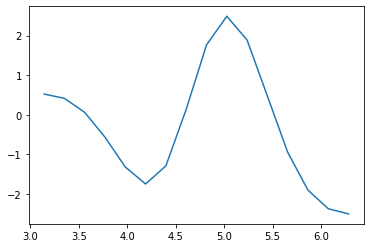

In [ ]:
# Чебышев через интегралы
from math import sin, cos, pi
from numpy import linspace
from scipy import integrate, fft
import matplotlib.pyplot as plt


dots = 256
N = 16
A1 = 1
A2 = 2
w1 = 3
w2 = 4
an, bn = [], []
A = []
x = linspace(-1,1,int(dots))
t = linspace(pi,2*pi,dots)
t2 = linspace(pi,2*pi,N)

def function(x):
  return A1*cos(w1*cos(x))+A2*sin(w2*cos(x))

def func2(x,n):
  return (A1*cos(w1*cos(x))+A2*sin(w2*cos(x)))*cos(n*x)

s = [A1*cos(w1*cos(i))+A2*sin(w2*cos(i)) for i in t]
s2 = [A1*cos(w1*cos(i))+A2*sin(w2*cos(i)) for i in t2]
a = fft.fft(s2) / N
a = a.real
a = [integrate.quad(function,0,pi)[0]/pi]
for n in range(1,N+1):
  a.append(integrate.quad(lambda x: (A1*cos(w1*cos(x))+A2*sin(w2*cos(x)))*cos(n*x),0,pi)[0]/pi*2)



print(len(a),a)
sum = []
for i in t:
  temp = 0
  for j in range(N+1):
    temp += a[j]*cos(j*i)
  sum.append(temp)
difference = [abs(sum[i] - s[i]) for i in range(dots)]
#t = t[int((len(t)/2)):]
#s = s[int((len(s)/2)):]
#sum = sum[int((len(sum)/2)):]
#difference = difference[int((len(difference)/2)):]

plt.plot(x,difference)
plt.show()
plt.plot(x,sum,x,s)
plt.show()

# Lab 4 ✓
Собственные значение и собственные вектора

In [ ]:
from sympy.matrices import Matrix
from sympy import diff, pprint
from sympy.utilities.lambdify import lambdify
from sympy.abc import symbols

m  = Matrix([[16,3,2],
             [3,5,1],
             [2,1,10]])
#m = Matrix([[5,5,3,4],[5,7,8, 6],[3, 8, 3, 2],[4, 6, 2, 1]])
eigenValues = [10*i for i in range(0,len(m[0,:]))]
iter1 = 40
iter2 = 40
eps = 1.0e-5
tau = 0.5
lamda = symbols('lamda')
chareq = m.charpoly(lamda)
chareqdev = diff(chareq)

fchareq = lambdify(lamda, chareq.as_expr())
fchareqdev = lambdify(lamda, chareqdev.as_expr())

for _ in range(iter1):
  for i in range(len(eigenValues)):
    eigenValues[i] = eigenValues[i] - fchareq(eigenValues[i])/fchareqdev(eigenValues[i])
print('Собственные значения матрицы:\n')
pprint(Matrix(eigenValues))

######
import numpy as np
from numpy.linalg import eig
from math import sqrt

A = np.array(m,dtype='float64')
A11 = np.copy(A)

def criteria(eigenVector, eigenValue):
  global A11
  return np.linalg.norm(((A11 - (np.eye(len(A11)) * eigenValue)).dot(eigenVector)).astype('float64'))

f = np.array([[0] for _ in range(len(A))])
for eigenValue in eigenValues:
  A = np.array(m,dtype='float64')
  for i in range(len(A)):
    A[i,i] = A[i,i] - eigenValue
  w = 1
  Xstart = np.array([[1] for _ in range(len(A))],dtype='float64')
  XJacobi = np.copy(Xstart)
  XSeidel = np.copy(Xstart)
  XSOR = np.copy(Xstart)
  iterations = [0,0,0]

  while criteria(XJacobi, eigenValue) > eps: # Jacobi iter
    xn1 = [1 for _ in range(len(A))]
    for i in range(len(A)):
      axn = 0
      for j in range(len(A)):
        axn += A[i,j]*XJacobi[j]
      xn1[i] = XJacobi[i] + (-axn + f[i])/A[i,i]*tau
    XJacobi = xn1
    iterations[0] += 1

  while criteria(XSeidel, eigenValue) > eps: # Seidel iter
    xn1 = [1 for _ in range(len(A))]
    for i in range(len(A)):
      a1xn = 0
      for j in range(i):
        a1xn += A[i,j]*xn1[j]
      a2xn = 0
      for j in range(i+1, len(A)):
        a2xn += A[i,j]*XSeidel[j]
      xn1[i] = (-a1xn - a2xn + f[i])/A[i,i]
    XSeidel = xn1
    iterations[1] += 1
    
  while criteria(XSOR, eigenValue) > eps: # SOR iter
    xn1 = [1 for _ in range(len(A))]
    for i in range(len(A)):
      a1xn = 0
      for j in range(i):
        a1xn += A[i,j]*xn1[j]
      a2xn = 0
      for j in range(i+1, len(A)):
        a2xn += A[i,j]*XSOR[j]
      xn1[i] = w*(-a1xn - a2xn + f[i])/A[i,i] + (1-w)*XSOR[i]
    XSOR = xn1
    iterations[2] += 1
  coef1 = np.linalg.norm(XJacobi)
  coef2 = np.linalg.norm(XSeidel)
  coef3 = np.linalg.norm(XSOR)
  for i in range(len(XJacobi)):
    XJacobi[i] = abs(float(XJacobi[i]/coef1))
    XSeidel[i] = abs(float(XSeidel[i]/coef2))
    XSOR[i] = abs(float(XSOR[i]/coef3))
  print('\n', 'Eigen value:', eigenValue)
  print('Jacobi; Iters: ', iterations[0], '\n')
  pprint(Matrix(XJacobi))
  print('Seidel; Iters: ', iterations[1], '\n')
  pprint(Matrix(XSeidel))
  print('SOR; Iters: ', iterations[2], '\n')
  pprint(Matrix(XSOR))
  print('---------------')
truevalues = eig(np.array(m,dtype='float64'))
print('\nTrue eigen values\n')
pprint(Matrix(truevalues[0]))
print('\n\nTrue vectors\n')
pprint(Matrix(truevalues[1]))


Собственные значения матрицы:

⎡4.19347320636721⎤
⎢                ⎥
⎢9.39578020292749⎥
⎢                ⎥
⎣17.4107465907053⎦

 Eigen value: 4.19347320636721
Jacobi; Iters:  23 

⎡0.231439950907528 ⎤
⎢                  ⎥
⎢0.968937431440103 ⎥
⎢                  ⎥
⎣0.0871539045492278⎦
Seidel; Iters:  7 

⎡0.231442331628925 ⎤
⎢                  ⎥
⎢0.968937004376609 ⎥
⎢                  ⎥
⎣0.0871523303179582⎦
SOR; Iters:  7 

⎡0.231442331628925 ⎤
⎢                  ⎥
⎢0.968937004376609 ⎥
⎢                  ⎥
⎣0.0871523303179582⎦
---------------

 Eigen value: 9.39578020292749
Jacobi; Iters:  17 

⎡0.296111203774615 ⎤
⎢                  ⎥
⎢0.0151734747808509⎥
⎢                  ⎥
⎣ 0.95503294218693 ⎦
Seidel; Iters:  13 

⎡0.296111358444232 ⎤
⎢                  ⎥
⎢0.0151729301099598⎥
⎢                  ⎥
⎣0.955032902884602 ⎦
SOR; Iters:  13 

⎡0.296111358444232 ⎤
⎢                  ⎥
⎢0.0151729301099598⎥
⎢                  ⎥
⎣0.955032902884602 ⎦
---------------

 Eigen value: 17.410746590705

# Lab 5 ✓
Обратная задача по нахождению диэлектрической проницаемости

epsilon blue = real, orange = imaginary


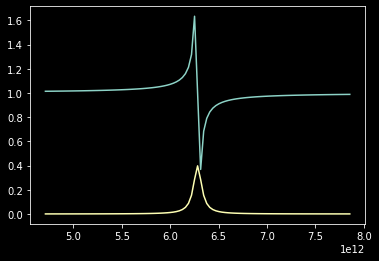

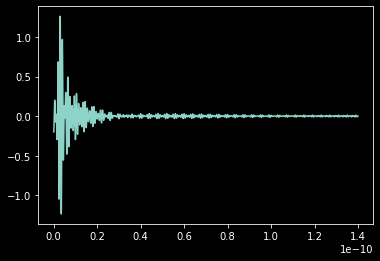

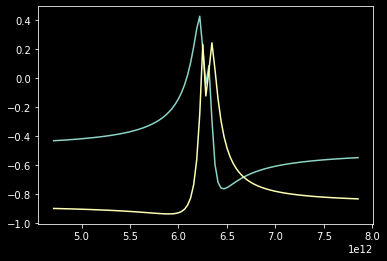

In [1]:
# Генерация данных
from math import pi
from cmath import exp, sqrt
import matplotlib.pyplot as plt
from numpy import real, imag
wpl = 0.5e12
G = 0.1e12
w1 = 2*pi*1e12
F1 = 1
f0 = 1e12
tp = 0.5e-12
z = 1e-3
d = 0.5e-3
w0 = 2*pi*f0
c = 3e8
k0 = w0/c
#import pandas as pd
#import io
#df = pd.read_csv('123.csv')
#df['w'][0]
#1j*1j

w = []
EPS = []
N = []
F = []
T = []
Etr = []
TIME = []
dw = 0.005e12*2*pi
for i in range(-50,51):
  w.append(w0+i*dw)

for i in range(len(w)):
  wtemp = w1**2 - w[i]**2
  EPS.append(1+wpl**2*F1*(wtemp/(wtemp**2+w[i]*G**2)+complex(0,G*w[i]/(wtemp**2+w[i]**2*G**2))))
  N.append(sqrt(EPS[i]))
  F.append(2*sqrt(pi)*tp*exp(-(w[i]-w0)**2*tp**2))
  T.append(4*N[i]/((N[i]+1)**2*exp(-1j*k0*N[i]*d)-(N[i]-1)**2*exp(1j*k0*N[i]*d))) #k0 = w/c

dt = tp/10
for i in range(2800):
  t = dt*i
  TIME.append(t)
  Etemp = 0
  for j in range(len(w)):
    Etemp += exp(-1j*w[j]*(t-z/c))*F[j]*T[j]*dw
  Etr.append(1/pi*Etemp.real)
  #Etr.append(1/2/pi*Etemp)
print('epsilon blue = real, orange = imaginary')
plt.plot(w,real(EPS))
plt.plot(w,imag(EPS))
plt.show()
plt.plot(TIME,Etr)
plt.show()
plt.plot(w,real(T))
plt.plot(w,imag(T))
plt.show()

In [17]:
import pandas as pd
out = (pd.DataFrame.from_dict({'Ert': TIME , 'Time': Etr})
       .explode(['Ert','Time']))
out.to_csv("data.csv")

/home/puglet5/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


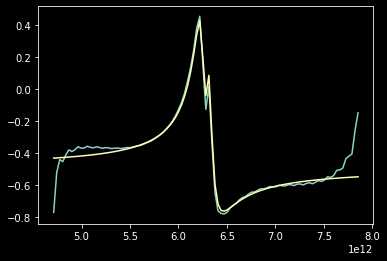

hello
n


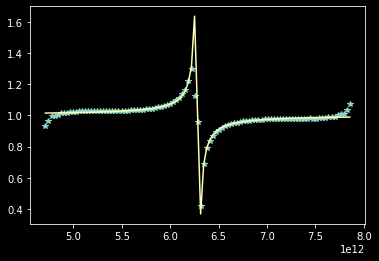

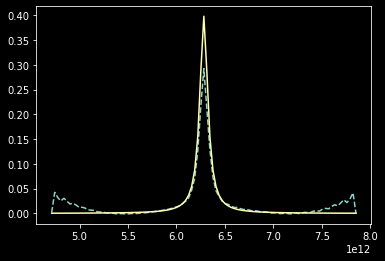

In [20]:
cc

In [21]:
len(Tsec)

101

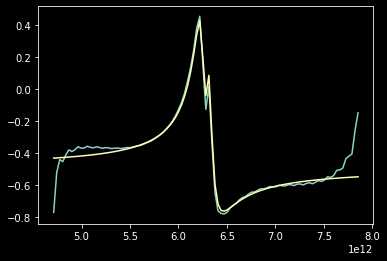

hello


TypeError: Cannot convert -10.471975511965978j to Decimal

In [2]:
# часть 2 обратный ход
from decimal import Decimal
from math import e
from cmath import exp
Tsec = []
for i in range(len(w)):
  Ttemp = 0
  for j in range(len(TIME)):
    Ttemp += exp(1j*w[i]*(TIME[j]-z/c))*Etr[j]*dt
  Tsec.append(Ttemp/F[i])
plt.plot(w,Tsec)
plt.plot(w,T)
plt.show()
dece = Decimal(e)
import numpy as np
func = lambda nn, i: 4*nn/((nn+1)**2*exp(-1j*k0*nn*d)-(nn-1)**2*exp(1j*k0*nn*d)) - Tsec[i]
print('hello')
dsalk = lambda n: 4*n*(1j*d*k0*(n-1)**2*exp(d*1j*k0*n)+d*1j*k0*(n+1)**2*exp(-1j*d*k0*n)-(2-2*n)*exp(d*1j*k0*n)-(2*n+2)*exp(-1j*d*k0*n))/((-(n-1)**2*exp(d*1j*k0*n)+(n+1)**2*exp(-1j*d*k0*n))**2)+(4/(-(n-1)**2*exp(d*1j*k0*n)+(n+1)**2*exp(-1j*d*k0*n)))

nn = [1 for i in range(len(T))]
for smth in range(6):
  nprev = nn
  for i in range(len(Tsec)):
    nn[i] = nprev[i] - (4*nprev[i]/((nprev[i]+1)**2*dece**Decimal(-1j*k0*nprev[i]*d)-(nprev[i]-1)**2*dece**Decimal(1j*k0*nprev[i]*d)) - Tsec[i])/(4*nprev[i]*(1j*d*k0*(nprev[i]-1)**2*dece**Decimal(d*1j*k0*nprev[i])+d*1j*k0*(nprev[i]+1)**2*dece**Decimal(-1j*d*k0*nprev[i])-(2-2*nprev[i])*dece**Decimal(d*1j*k0*nprev[i])-(2*nprev[i]+2)*dece**Decimal(-1j*d*k0*nprev[i]))/((-(nprev[i]-1)**2*dece**Decimal(d*1j*k0*nprev[i])+(nprev[i]+1)**2*dece**Decimal(-1j*d*k0*nprev[i]))**2)+(4/(-(nprev[i]-1)**2*dece**Decimal(d*1j*k0*nprev[i])+(nprev[i]+1)**2*dece**Decimal(-1j*d*k0*nprev[i]))))
    #print(i)
  #print(smth)
print('n')
nn[49] = nn[48]/2+nn[50]/2
nre = []
nim = []
for i in range(len(nn)):
  nn[i] =nn[i]*nn[i]
  nre.append(nn[i].real)
  nim.append(nn[i].imag)
nim[51] = nim[50]/2 + nim[52]/2
plt.plot(w, nre, '*')
plt.plot(w, real(EPS))
plt.show()
plt.plot(w, nim, '--')
plt.plot(w, imag(EPS))
plt.show()
#dsalk = lambda n: 4*n*(1j*d*k0*(n-1)**2*exp(d*1j*k0*n)+d*1j*k0*(n+1)**2*exp(-1j*d*k0*n)-(2-2*n)*exp(d*1j*k0*n)-(2*n+2)*exp(-1j*d*k0*n))/(-(n-1)**2*exp(d*1j*k0*n)+(n+1)**2*exp(-1j*d*k0*n))**2+4/(-(n-1)**2*exp(d*1j*k0*n)+(n+1)**2*exp(-1j*d*k*n))


# Lab 6 ✓
Нахождение минимума целевой функции, заданной в области

In [ ]:
import numpy as np
from numpy.linalg import norm
from numpy import linspace

A = 5
B = 6
C = 9
D = 3
E = 5
F = 8
R = 10
eps = 1e-4
step = 0.01
dots = 100
mode = 2 # Gradient descent method. 1 stands for rough, 2 for optimized
startPos = np.array([1, 1], dtype='float64')
xy = linspace(-5,5,dots)

function = lambda x, y: 0.5*A*x**2 + B*x*y + 0.5*C*y**2 - D*x - E*y + F
xDerivative1 = lambda x, y: A*x + B*y - D
yDerivative1 = lambda x, y: B*x + C*y - E

# Analytics
xTrue = (B*E-C*D)/(B*B-C*A)
yTrue = (D-A*xTrue)/B
print('Analytical  x:', xTrue,', y: ', yTrue,', z: ', function(xTrue,yTrue))

# Gradient descent
def gradDesc(pos):
  return np.array([xDerivative1(pos[0], pos[1]), yDerivative1(pos[0], pos[1])])

if mode == 2:
  def getNewPos(pos, dir, lval):
    global step
    lpos = pos
    tempPos = np.array([pos[0] - step*dir[0], pos[1] - step*dir[1]])
    tempVal = function(tempPos[0], tempPos[1])
    while tempVal < lval:
      lpos = tempPos
      lval = tempVal
      tempPos = np.array([tempPos[0] - step*dir[0], tempPos[1] - step*dir[1]])
      tempVal = function(tempPos[0], tempPos[1])
    if lval < tempVal:
      return lpos, lval
    else:
      return tempPos, tempVal

  lastPos = startPos
  lastValue = function(lastPos[0], lastPos[1])
  actPos, actVal = getNewPos(lastPos, gradDesc(lastPos), lastValue)
  iterations = 0
  while norm(lastPos - actPos) > eps:
    lastPos = actPos
    lastValue = actVal
    actPos, actVal = getNewPos(lastPos, gradDesc(lastPos), lastValue)
    iterations += 1
else:
  lastPos = startPos
  lastValue = function(lastPos[0], lastPos[1])
  tempPos = np.array([lastPos[0] - step*gradDesc(lastPos)[0], lastPos[1] - step*gradDesc(lastPos)[1]])
  iterations = 0
  while norm(lastPos - tempPos) > eps:
    lastPos = tempPos
    lastValue = function(lastPos[0], lastPos[1])
    tempPos = np.array([lastPos[0] - step*gradDesc(lastPos)[0], lastPos[1] - step*gradDesc(lastPos)[1]])
    iterations += 1
print('Gradient    x:', lastPos[0],', y: ', lastPos[1],', z: ', function(lastPos[0], lastPos[1]), ' Iterations', iterations)

# Newton
lastPos = startPos
lastValue = function(lastPos[0], lastPos[1])
tempPos = np.array([lastPos[0] - xDerivative1(lastPos[0], lastPos[1])/A, lastPos[1] - yDerivative1(lastPos[0], lastPos[1])/C])
iterations = 0
while norm(lastPos - tempPos) > eps:
  lastPos = tempPos
  lastValue = function(lastPos[0], lastPos[1])
  tempPos = np.array([lastPos[0] - xDerivative1(lastPos[0], lastPos[1])/A, lastPos[1] - yDerivative1(lastPos[0], lastPos[1])/C])
  iterations += 1
print('Newton      x:', lastPos[0],', y: ', lastPos[1],', z: ', function(lastPos[0], lastPos[1]), ' Iterations', iterations)

# Graphs
x,y = np.meshgrid(xy,xy)
z = 0.5*A*x**2 + B*x*y + 0.5*C*y**2 - D*x - E*y + F

import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(autosize=False,
                  width=600, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_traces(opacity=0.8, selector=dict(type='surface'))
fig.show()

Analytical  x: -0.3333333333333333 , y:  0.7777777777777777 , z:  6.555555555555555
Gradient    x: -0.33282999376805794 , y:  0.7773591552894065 , z:  6.555555713278328  Iterations 65
Newton      x: -0.333347852047655 , y:  0.777729382063371 , z:  6.555555570838052  Iterations 89


# Lab 7 ✓
Вычисление двойных интегралов методом Монте-Карло

In [ ]:
import numpy as np
from numpy import linspace
from random import randint
from scipy.integrate import dblquad, nquad
from math import sqrt

A = 4
B = 2
C = 3
R = 1
N = 100000
dotsNumber = 1000

xDots = linspace(-R, R, dotsNumber)
yDots = linspace(-R, R, dotsNumber)
z = lambda x, y: A*x**2 + B*y**2 + C
circ = lambda x, y: x**2 + y**2

# True integral
def bx():
  return [-1,1]
def by(x):
  return [-sqrt(1-x**2), sqrt(1-x**2)]
trueIntegral = nquad(z, [by, bx])[0]
print('True integral: ', trueIntegral)

# First method
count = 0
sum = 0
xTemp, yTemp, zTemp = [], [], []
for i in range(N):
  xTemp.append(xDots[randint(0,dotsNumber-1)])
  yTemp.append(yDots[randint(0,dotsNumber-1)])
  zTemp.append(z(xTemp[i], yTemp[i]))
  if circ(xTemp[i], yTemp[i]) <= 1:
    sum += z(xTemp[i], yTemp[i])
    count += 1
firstIntegral = 4*R/N*sum
print('First method: ', firstIntegral)

# Second method
zMax = max(zTemp)
zSpace = linspace(0, zMax, dotsNumber)
count = 0
for i in range(N):
  zTemp = zSpace[randint(0,dotsNumber-1)]
  if circ(xTemp[i], yTemp[i]) <= 1 and zTemp < z(xTemp[i], yTemp[i]):
    count += 1
secondIntegral = 4*R*zMax*count/N
print('Second method: ', secondIntegral)

True integral:  14.13716694115397
First method:  14.158296948640134
Second method:  14.11308


# Lab 8 ✓
Решения начальной задачи Коши для линейного ОДУ первого порядка

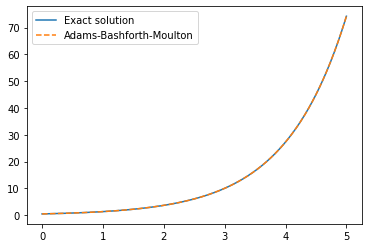

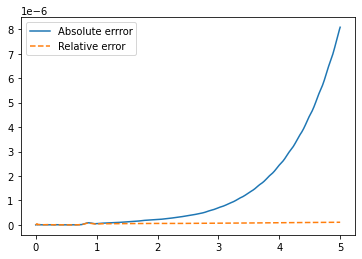

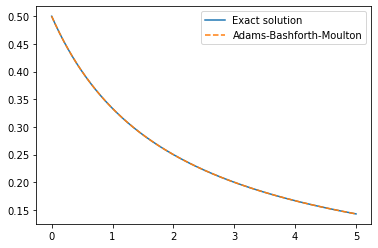

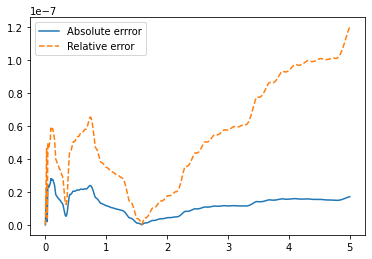

In [ ]:
import numpy as np
from numpy import linspace
from scipy.integrate import odeint
import matplotlib.pyplot as plt

h = 0.01
steps = 5/h + 1
xSpace = np.linspace(0, 5, int(steps))
y1, y2 = [0.5], [0.5]
y11 , y22 = y1, y2
# Рунге-Кутт
# ydev = y, y(0) = 0, x = [0,5]
yder = lambda y: y
k1 = lambda y: yder(y)
k2 = lambda y: yder(y + k1(y)*h/2)
k3 = lambda y: yder(y + k2(y)*h/2)
k4 = lambda y: yder(y + k3(y)*h)
bashfort = lambda y, iter: y[iter] + h/720*(1901*yder(y[iter]) - 2774*yder(y[iter-1]) + 2616*yder(y[iter-2]) - 1274*yder(y[iter-3]) + 251*yder(y[iter-4])) 
molton = lambda y, iter: y[iter] + h/720*(251*yder(bashfort(y, iter)) + 646*yder(y[iter]) - 264*yder(y[iter-1]) + 106*yder(y[iter-2]) - 19*yder(y[iter-3]))
for i in range(1, int(steps)):
  y1.append(y1[i-1]+(k1(y1[i-1])+2*k2(y1[i-1])+2*k3(y1[i-1])+k4(y1[i-1]))*h/6)
y11 = y1
for i in range(5, int(steps)):
  y11[i] = molton(y11, i-1)
# yder = -y, y(0) = 1, x = [0,5]
yder = lambda y: -y**2
for i in range(1, int(steps)):
  y2.append(y2[i-1]+(k1(y2[i-1])+2*k2(y2[i-1])+2*k3(y2[i-1])+k4(y2[i-1]))*h/6)
y22 = y2
for i in range(5, int(steps)):
  y22[i] = molton(y22, i-1)
sol1 = odeint(lambda y, t: y, [0.5,0], xSpace)[:,0]
sol2 = odeint(lambda y, t: -y**2, [0.5,0], xSpace)[:,0]
#print(len(sol2[:,0]), len(y2))
absdif1, reldif1, absdif2, reldif2 = [], [], [], []
for i in range(int(steps)):
  absdif1.append(abs(sol1[i] - y11[i]))
  reldif1.append(absdif1[i]/sol1[i])
  absdif2.append(abs(sol2[i] - y22[i]))
  reldif2.append(absdif2[i]/sol2[i])

fig, ax = plt.subplots()
ax.plot(xSpace, sol1, '-', label='Exact solution')
ax.plot(xSpace, y11, '--', label='Adams-Bashforth-Moulton')
leg = ax.legend()
fig.show()
fig, ax = plt.subplots()
ax.plot(xSpace, absdif1, '-', label='Absolute errror')
ax.plot(xSpace, reldif1, '--', label='Relative error')
leg = ax.legend()
fig.show()
fig, ax = plt.subplots()
ax.plot(xSpace, sol2, '-', label='Exact solution')
ax.plot(xSpace, y22, '--', label='Adams-Bashforth-Moulton')
leg = ax.legend()
fig.show()
fig, ax = plt.subplots()
ax.plot(xSpace, absdif2, '-', label='Absolute errror')
ax.plot(xSpace, reldif2, '--', label='Relative error')
leg = ax.legend()
fig.show()

# Lab 9 ✓
Решения начальной задачи Коши для линейного ОДУ второго порядка с помощью линейного интегрального уравнения Волтерра 

C:\Users\79511\AppData\Local\Temp\ipykernel_2104\2210280233.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


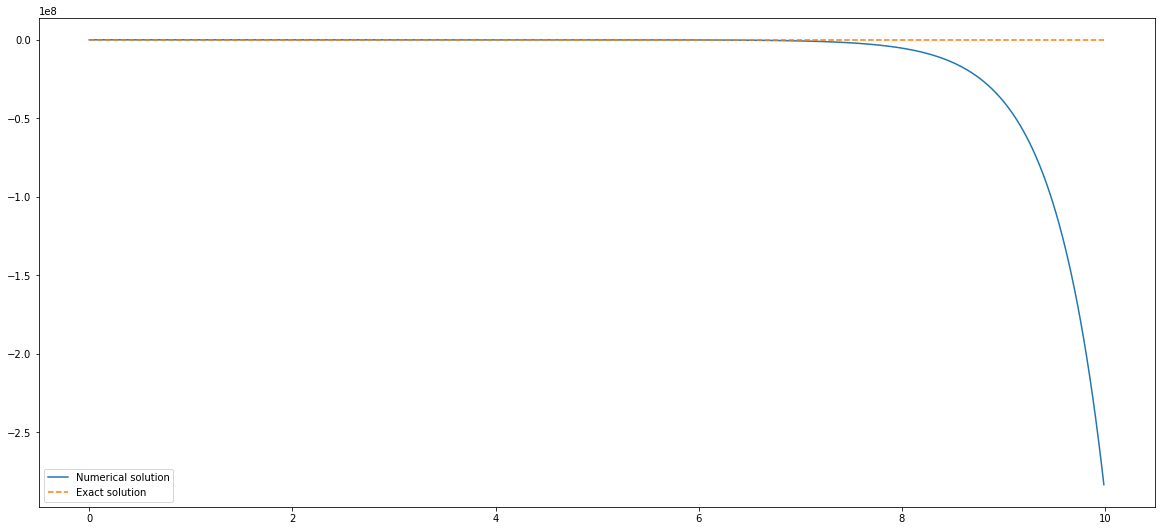

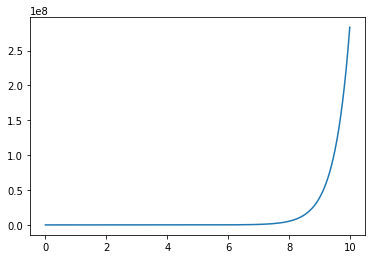

In [5]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# u'' + a1*u' + a2*u = F
#u(0) = c0; u'(0) = c1
a1 = 3
a2 = 2
c0 = 1
c1 = 0
F = lambda x: np.cos(x)
iterations = 100
h = 0.01
K = lambda x, y: a1 + a2*(x-y)
f = lambda x: F(x) - c1*a1 - (c1*x+c0)*a2

xSpace = np.arange(0, 10, h)
ySpace = f(xSpace)

def wtf(ytemp):
  yt = ytemp
  for i in range(len(xSpace)):
    temp = 0
    for j in range(i+1):
      temp += 2*K(xSpace[j], xSpace[i])*ytemp[j]
    temp += -K(xSpace[i], xSpace[0])*ytemp[0] - K(xSpace[i], xSpace[i])*ytemp[i]
    yt[i] = f(xSpace[i]) + temp*h/2
  return yt

yt = wtf(ySpace)
for i in range(iterations):
  ySpace = np.copy(yt)
  yt = wtf(ySpace)
ytemp = np.copy(yt)
for i in range(len(xSpace)):
  temp = 0
  for j in range(i):
    temp += 2*(xSpace[i]-xSpace[j])*ytemp[j]
  temp += -(xSpace[0]-xSpace[i])*ytemp[0]
  yt[i] = c0 + c1*xSpace[i] + temp*h/2
  
#plt.plot(xSpace,yt)
#plt.show()

def equation(u, x):
  return (u[1], -u[1]*a1 - u[0]*a2 + F(x))
solution = odeint(equation, [1,0], xSpace)[:,0]
#plt.plot(xSpace, solution)
#plt.show()
fig, ax = plt.subplots()
fig.set_size_inches((20,9))
ax.plot(xSpace, yt, '-', label='Numerical solution')
ax.plot(xSpace, solution, '--', label='Exact solution')
leg = ax.legend()
fig.show()
plt.show()
#plt.plot(xSpace, ytemp)
#plt.show()
difff = []
for i in range(len(xSpace)):
  difff.append(abs(yt[i]-solution[i]))
plt.plot(xSpace, difff)
plt.show()

C:\Users\79511\AppData\Local\Temp\ipykernel_2104\52958157.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


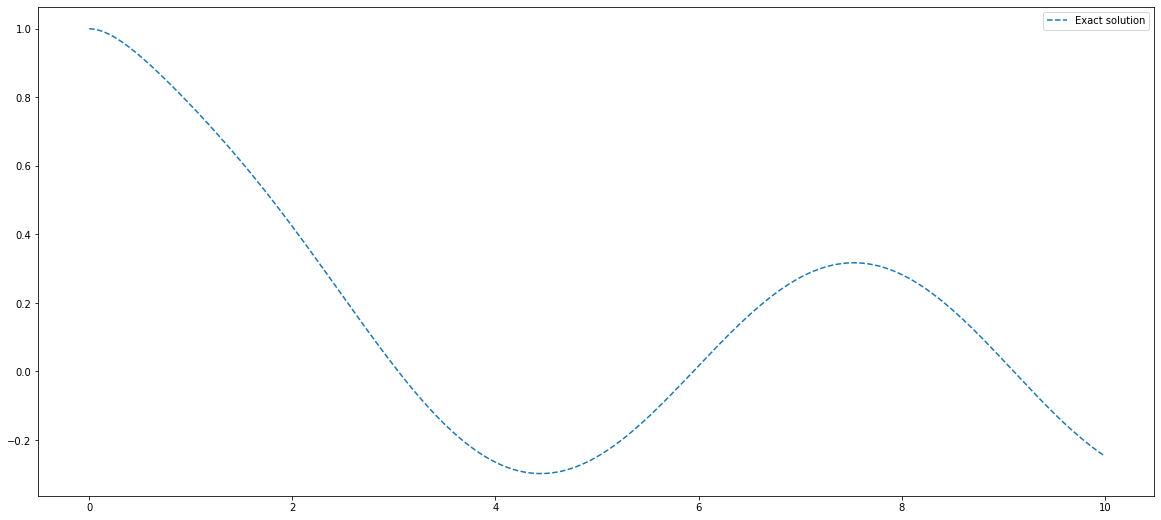

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches((20,9))
ax.plot(xSpace, solution, '--', label='Exact solution')
leg = ax.legend()
fig.show()
plt.show()

C:\Users\79511\AppData\Local\Temp\ipykernel_2104\3521864558.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


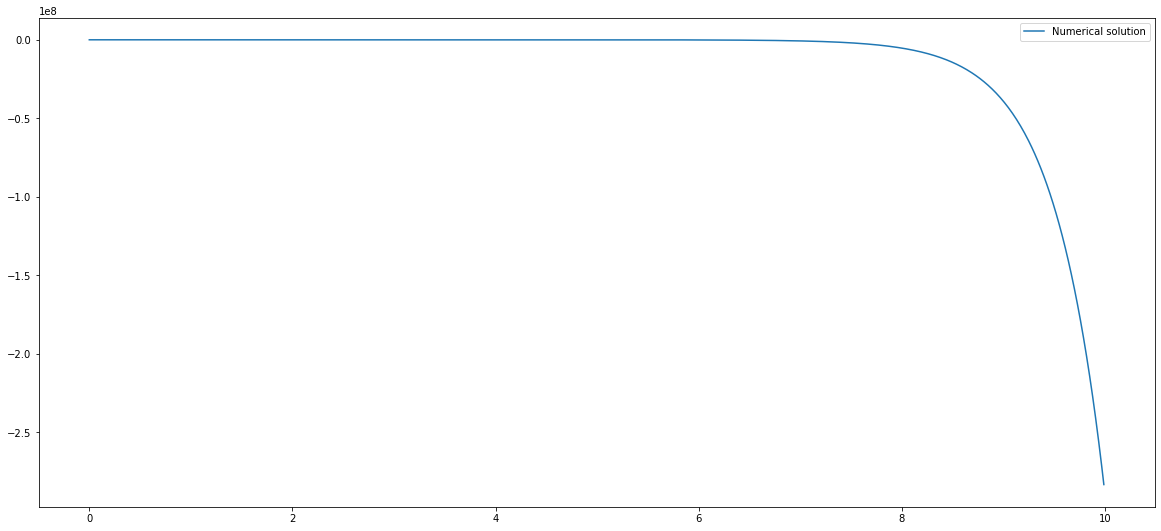

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches((20,9))
ax.plot(xSpace, yt, '-', label='Numerical solution')
leg = ax.legend()
fig.show()
plt.show()